<a href="https://colab.research.google.com/github/AbdulmalikGiwa/CustomerSentiment/blob/master/Customer_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Sentiment Analysis

This project is focused on the analysis of customer sentiment based on review and feedback from customers, the main questions to be answered are:


1.   What is the business doing well? 
2.   What are the customers happy about?
3.   What are the customers displeased with and what improvements can be made
4.   How are ratings trending over time?





In [0]:
#importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#reading data from json to dataframe
df = pd.read_json('/content/reviews (2).json')

In [3]:
df.head()

,reviewer,date_reviewed,star_rating,message,order_id
0,Shaf,05/29/2020,5,Came safely and looks just as good if not bett...,1596984696
1,Ellie,05/29/2020,5,This card is so cute! He print quality is grea...,1630295690
2,Star-Lord,05/29/2020,5,,1638973116
3,Ria,05/28/2020,5,Love this card! Thank you!,1649303614
4,kimberlygrahn,05/28/2020,5,,1578872704


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer       683 non-null    object
 1   date_reviewed  683 non-null    object
 2   star_rating    683 non-null    int64 
 3   message        683 non-null    object
 4   order_id       683 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [0]:
#converting date reviewed column to datetime object, will be useful in plotting histogram
df['date_reviewed'] = pd.to_datetime(df['date_reviewed'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewer       683 non-null    object        
 1   date_reviewed  683 non-null    datetime64[ns]
 2   star_rating    683 non-null    int64         
 3   message        683 non-null    object        
 4   order_id       683 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 26.8+ KB


Successfully converted to datetime

In [7]:
#display shape of the entire table
print(df.shape)

(683, 5)


The dataset consists of five(5) columns and 683 rows

In [8]:
print(df.dtypes)

reviewer                 object
date_reviewed    datetime64[ns]
star_rating               int64
message                  object
order_id                  int64
dtype: object


In [9]:
#checking for null values
df.isna().sum()

reviewer         0
date_reviewed    0
star_rating      0
message          0
order_id         0
dtype: int64

From this, it says there are no missing values identified as'NaN' in the dataset. Further investigation will be done to check if there are unusual values within the dataset

In [10]:
df.head()

,reviewer,date_reviewed,star_rating,message,order_id
0,Shaf,2020-05-29,5,Came safely and looks just as good if not bett...,1596984696
1,Ellie,2020-05-29,5,This card is so cute! He print quality is grea...,1630295690
2,Star-Lord,2020-05-29,5,,1638973116
3,Ria,2020-05-28,5,Love this card! Thank you!,1649303614
4,kimberlygrahn,2020-05-28,5,,1578872704


It can be seen from the table above that a few rows do not have any values under the message column, these values do not explicitly identify as NaN, they are just more of a blank space representing customer that didn't leave any feedback, with this information I'll be creating an additional datframe which will consist of only the customers with feedback, although the original dataframe will still be left since the reviews from that is needed later on.  

In [11]:
df.iloc[2,3]

''

this is to get the string for the absent messages

In [0]:
with_message = df.drop(df.loc[df['message']==''].index)

In [13]:

print(with_message.shape)

(325, 5)


We have 325 rows of customers that left a feedback

In [14]:
with_message.head()

,reviewer,date_reviewed,star_rating,message,order_id
0,Shaf,2020-05-29,5,Came safely and looks just as good if not bett...,1596984696
1,Ellie,2020-05-29,5,This card is so cute! He print quality is grea...,1630295690
3,Ria,2020-05-28,5,Love this card! Thank you!,1649303614
5,Morgan,2020-05-28,5,"Adorable, and quick shipping! Thank you!",1650388617
7,Aaron,2020-05-27,5,Exactly as advertised. My wife had a giggle as...,1618315731


Seperating rows with positive feedback from rows with negative feedbback, positive is assumed to be any cutomer who gives a rating equal or greater than 4 while ratings lesser than 4 are considered negative

In [15]:
pos_rating= with_message.loc[with_message['star_rating']>=4] 
pos_rating.reset_index(drop=True, inplace=True)

neg_rating= with_message.loc[with_message['star_rating']<4]
neg_rating.reset_index(drop=True, inplace=True)

data= pos_rating['message'].values.tolist()
Counter = CountVectorizer(data,stop_words='english',ngram_range=(1,2),min_df=6)
transformed = Counter.fit_transform(data)

transformed.shape

(321, 95)

In [0]:
#function to cluster and add new column of clusters
def create_cluster(table,sparse_matrix) :
  no_of_clusters = 2
  model = KMeans(n_clusters=no_of_clusters, init='k-means++')
  model.fit(sparse_matrix)
  labels = model.labels_
  table['Group'] = labels
  return table

In [17]:
pos_rating = create_cluster(pos_rating, transformed)
group_0 = pos_rating.loc[pos_rating['Group']==0]
group_0.reset_index(drop=True, inplace=True)

group_1 = pos_rating.loc[pos_rating['Group']==1]
group_1.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
stopwords = list(STOPWORDS) +['Card','Thank','love','loved','cards','paper','great', 'Great','perfect','will']
def display_cloud(table,text_file) :
  np.savetxt(text_file,table['message'].values,fmt='%s' )
  words = open(text_file).read()
  MessageCloud = WordCloud(background_color='white',
                          max_words=2000,
                          stopwords=stopwords)
  MessageCloud.generate(words)
  fig = plt.figure()
  fig.set_figwidth(10) # set width
  fig.set_figheight(14)
  plt.imshow(MessageCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

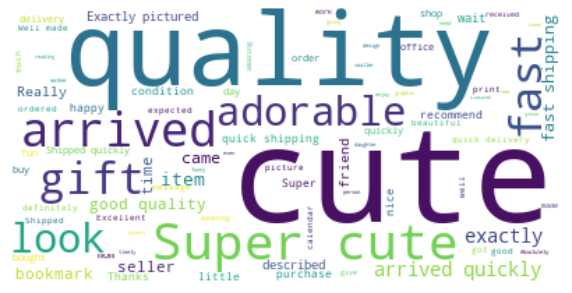

In [19]:

display_cloud(group_0,'group0.txt')

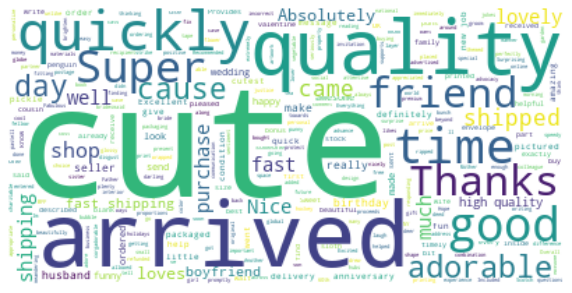

In [20]:
display_cloud(group_1,'group1.txt')

In [21]:
negdata= neg_rating['message'].values.tolist()
Counterneg = CountVectorizer(data,stop_words='english',ngram_range=(1,2))
transformedneg = Counterneg.fit_transform(negdata)

transformedneg.shape

(4, 83)

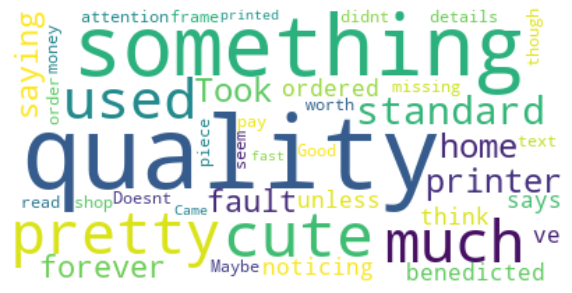

In [22]:
display_cloud(neg_rating,'neg.txt')

In [23]:
neg_rating

,reviewer,date_reviewed,star_rating,message,order_id
0,Johanna,2020-04-28,3,"The card is very cute, but the quality is pret...",1611681587
1,Devin,2019-12-30,3,Took forever to get to me. But the card was gr...,1519255394
2,M,2019-12-02,3,"My fault for not noticing before I ordered, bu...",1511822293
3,Leslie,2019-02-18,1,Maybe I didnt read all the details but its jus...,1412169364
